This notebook includes functions for both quicksort and bubblesort. Both functions track the number of assignments and conditionals generated for each sort as well as the runtime. At the bottom I have plotted each of these variables against the length of the input vector

In [2]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt

In [3]:
def bsort(mylist):
    # save starting time
    ts = time.process_time()
    # set assignment and conditional counters to 0
    assign = 0
    cond = 0
    cond += 1
    if len(mylist) > 1:
        for i in range(len(mylist)-1, 0,-1):
            for j in range(i):
                cond+= 1
                if mylist[j] > mylist[j+1]:
                    #saving the first value
                    temp = mylist[j]
                    assign += 1
                    # replacing first value with second (smaller) value
                    mylist[j] = mylist[j+1]
                    assign += 1
                    # replacing second value with first(larger) value
                    mylist[j+1] = temp
                    assign += 1
    # save finish time
    tf = time.process_time()
    # get run time
    runtime = tf - ts
    return cond, assign, runtime

In [4]:
# the partition function will partition a list around a pivotvalue one time
# it returns the ending rightmark, which can then be used as a split point for further ordering
def partition(mylist, start, end):
    p_assign = 0
    p_cond = 0
    
    pivotvalue = mylist[start]
    leftmark = start + 1
    rightmark = end
    
    done = False
    
    p_assign += 4
    while not done:
        # left mark moves along left side of list until leftmark is greater than either pivot value or rightmark
        p_cond += 2
        while leftmark <= rightmark and mylist[leftmark] <= pivotvalue:
            leftmark = leftmark + 1
            p_assign += 1
        # inverse for rightmark
        p_cond += 2
        while rightmark >= leftmark and mylist[rightmark] >= pivotvalue:
            rightmark = rightmark - 1
            p_assign += 1
        # when marks cross, end
        p_cond += 1
        if rightmark < leftmark:
            done = True
            p_assign += 1
        # otherwise, if one of marks is wrong compared to pivotvalue, swap the marks
        else:
            temp = mylist[leftmark]
            mylist[leftmark] = mylist[rightmark]
            mylist[rightmark] = temp
            p_assign += 3
        # now we have two halves sorted around the pivot value and the marks have passed each other
        # lets move the pivot value to the split point (where the rightmark is now)

    temp = mylist[start]
    mylist[start] = mylist[rightmark]
    mylist[rightmark] = temp
    
    p_assign += 3
    
    return (rightmark, p_assign, p_cond)
        

In [5]:
def runqsort(mylist, start, end, cond, assign):
    cond += 1
    if start < end:
        # run partition once to divide the list and get the splitpoint
        splitpoint, p_assign, p_cond = partition(mylist, start, end)
        assign += p_assign
        cond += p_cond
        
        # now run the function separately on each side of the splitpoint
        cond, assign = runqsort(mylist, start, splitpoint - 1, cond, assign)[1:3]
        cond, assign = runqsort(mylist, splitpoint + 1, end, cond, assign)[1:3]
        
    return mylist, cond, assign

In [6]:
def qsort(mylist):
    ts = time.process_time()
    sortlist, cond, assign = runqsort(mylist, 0, (len(mylist)-1), 0, 0)
    tf= time.process_time()
    runtime = tf - ts
    return cond, assign, runtime

In [7]:

lengths = list(range(100,1001,100))
b_cond = []
b_assign = []
b_runtime = []

# generate vectors of varying length
for n in lengths:
    vectors = (list(map(lambda x: [random.randint(-1000,1000) for p in range(n)], range(10))))
    
    tempcond = []
    tempassign = []
    tempruntime = []
    
    # sort the vectors and keep track of each dependent variable
    for i in range(len(vectors)):
        c, a, t = bsort(vectors[i])
        tempcond.append(c)
        tempassign.append(a)
        tempruntime.append(t)
        
    b_cond.append(tempcond)
    b_assign.append(tempassign)
    b_runtime.append(tempruntime)
    

In [8]:
lengths = list(range(100,1001,100))
q_cond = []
q_assign = []
q_runtime = []

# generate vectors of varying length
for n in lengths:
    vectors = (list(map(lambda x: [random.randint(-1000,1000) for p in range(n)], range(100))))
    
    tempcond = []
    tempassign = []
    tempruntime = []
    
    # sort the vectors and keep track of each dependent variable
    for i in range(len(vectors)):
        c, a, t = qsort(vectors[i])
        tempcond.append(c)
        tempassign.append(a)
        tempruntime.append(t)
        
    q_cond.append(tempcond)
    q_assign.append(tempassign)
    q_runtime.append(tempruntime)
    

In [9]:
# creating a plotting function to plot observed values and expected function for assignments, conditionals, and runtime
def sort_plot(vector, number, line, scale, yscale, ylab, title):
    fig = plt.figure(dpi = 300)
    filename = title + '.png'
    plt.xlabel("Length of Vector")
    plt.ylabel(ylab)
    plt.title(title)
    for i in range(len(lengths)):
        x = ([lengths[i]]*number)
        y = (vector[i])
        plt.scatter(x, y, s = 0.5, c = "blue")
    if line == 'square':
        plt.plot(lengths, list((lengths[i]**2)*scale for i in range(len(lengths))), label = 'O(n) = n^2')
    elif line == 'log':
        plt.plot(lengths, (lengths * np.log(lengths) * scale), label = 'O(n) = nlog(n)')
    if yscale == 'log':
        plt.yscale("log")
    plt.legend()
    fig.savefig(filename)
   


In [10]:
# creating scaling factors ("k") for plotting the expected line
qr_scale = np.mean(q_runtime[0])/(100*np.log(100))
qc_scale = np.mean(q_cond[0])/((100*np.log(100)))
qa_scale = np.mean(q_assign[0])/((100*np.log(100)))
br_scale = np.mean(b_runtime[0])/(100**2)
bc_scale = np.mean(b_cond[0])/(100**2)
ba_scale = np.mean(b_assign[0])/(100**2)

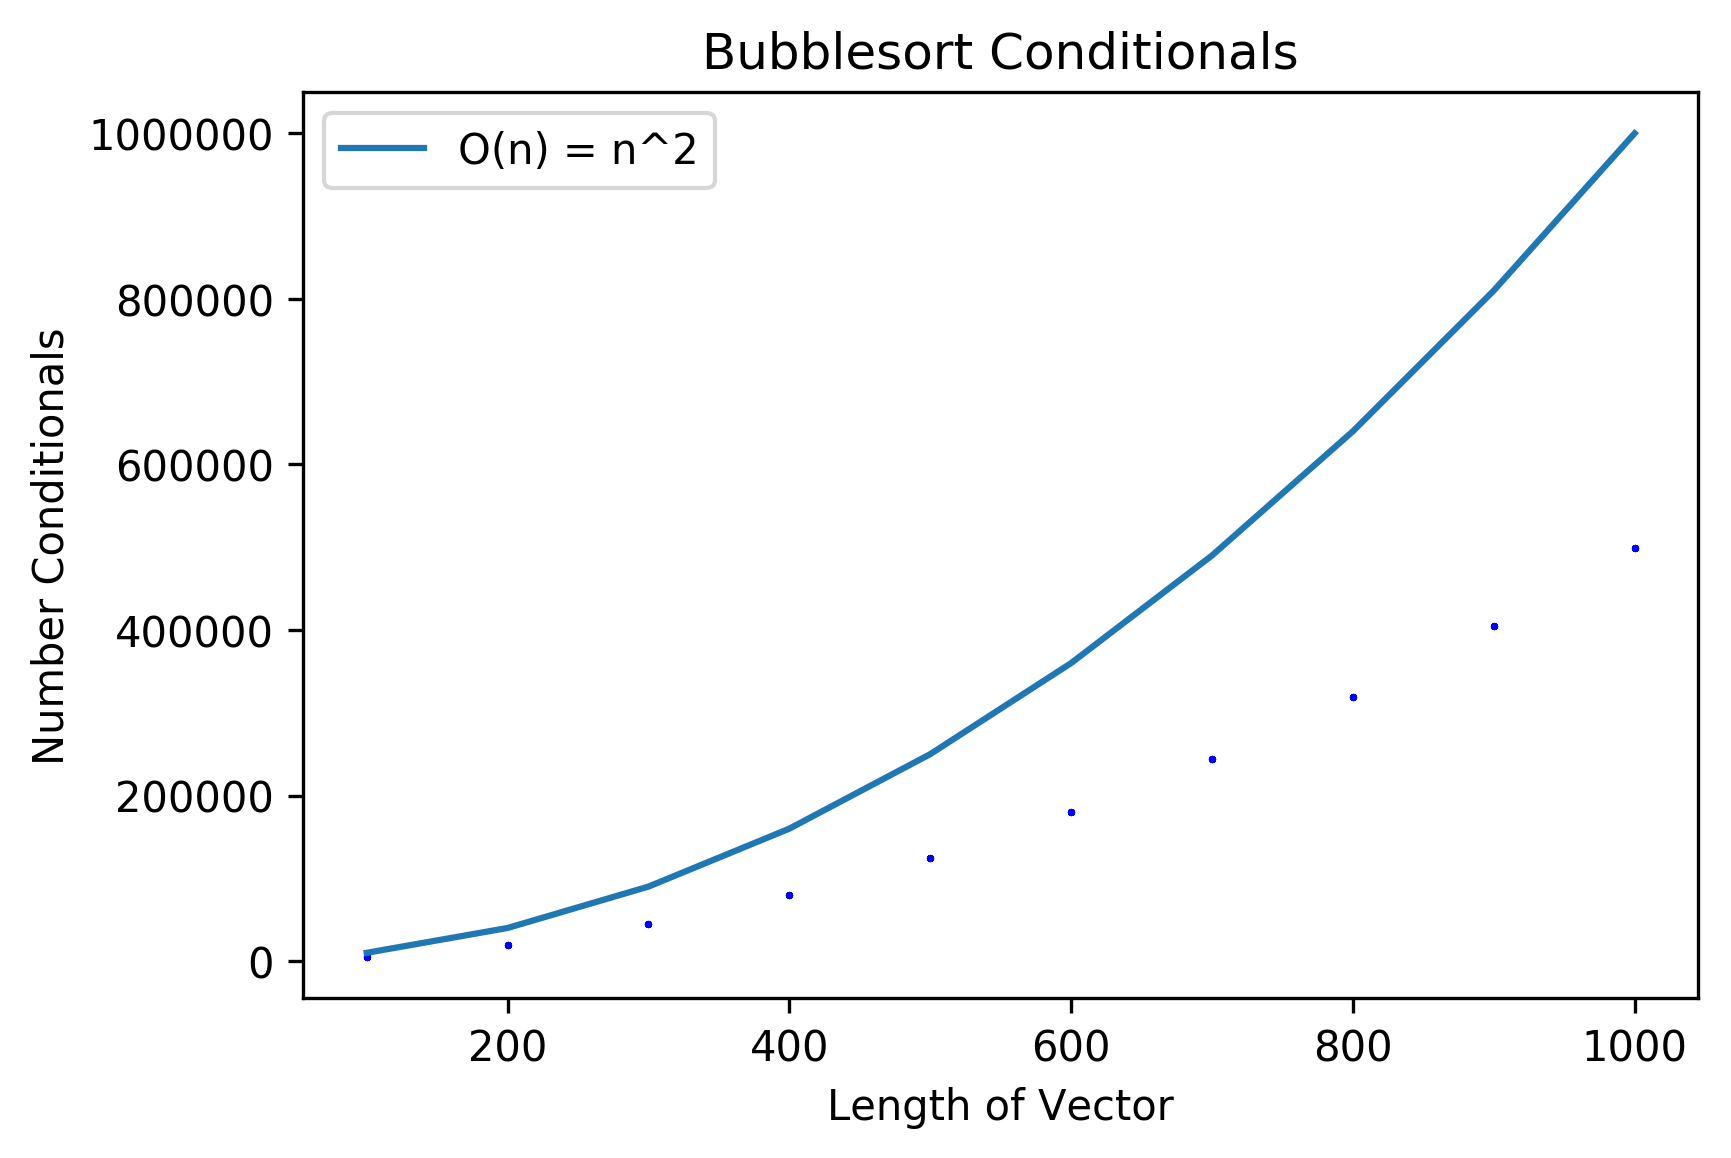

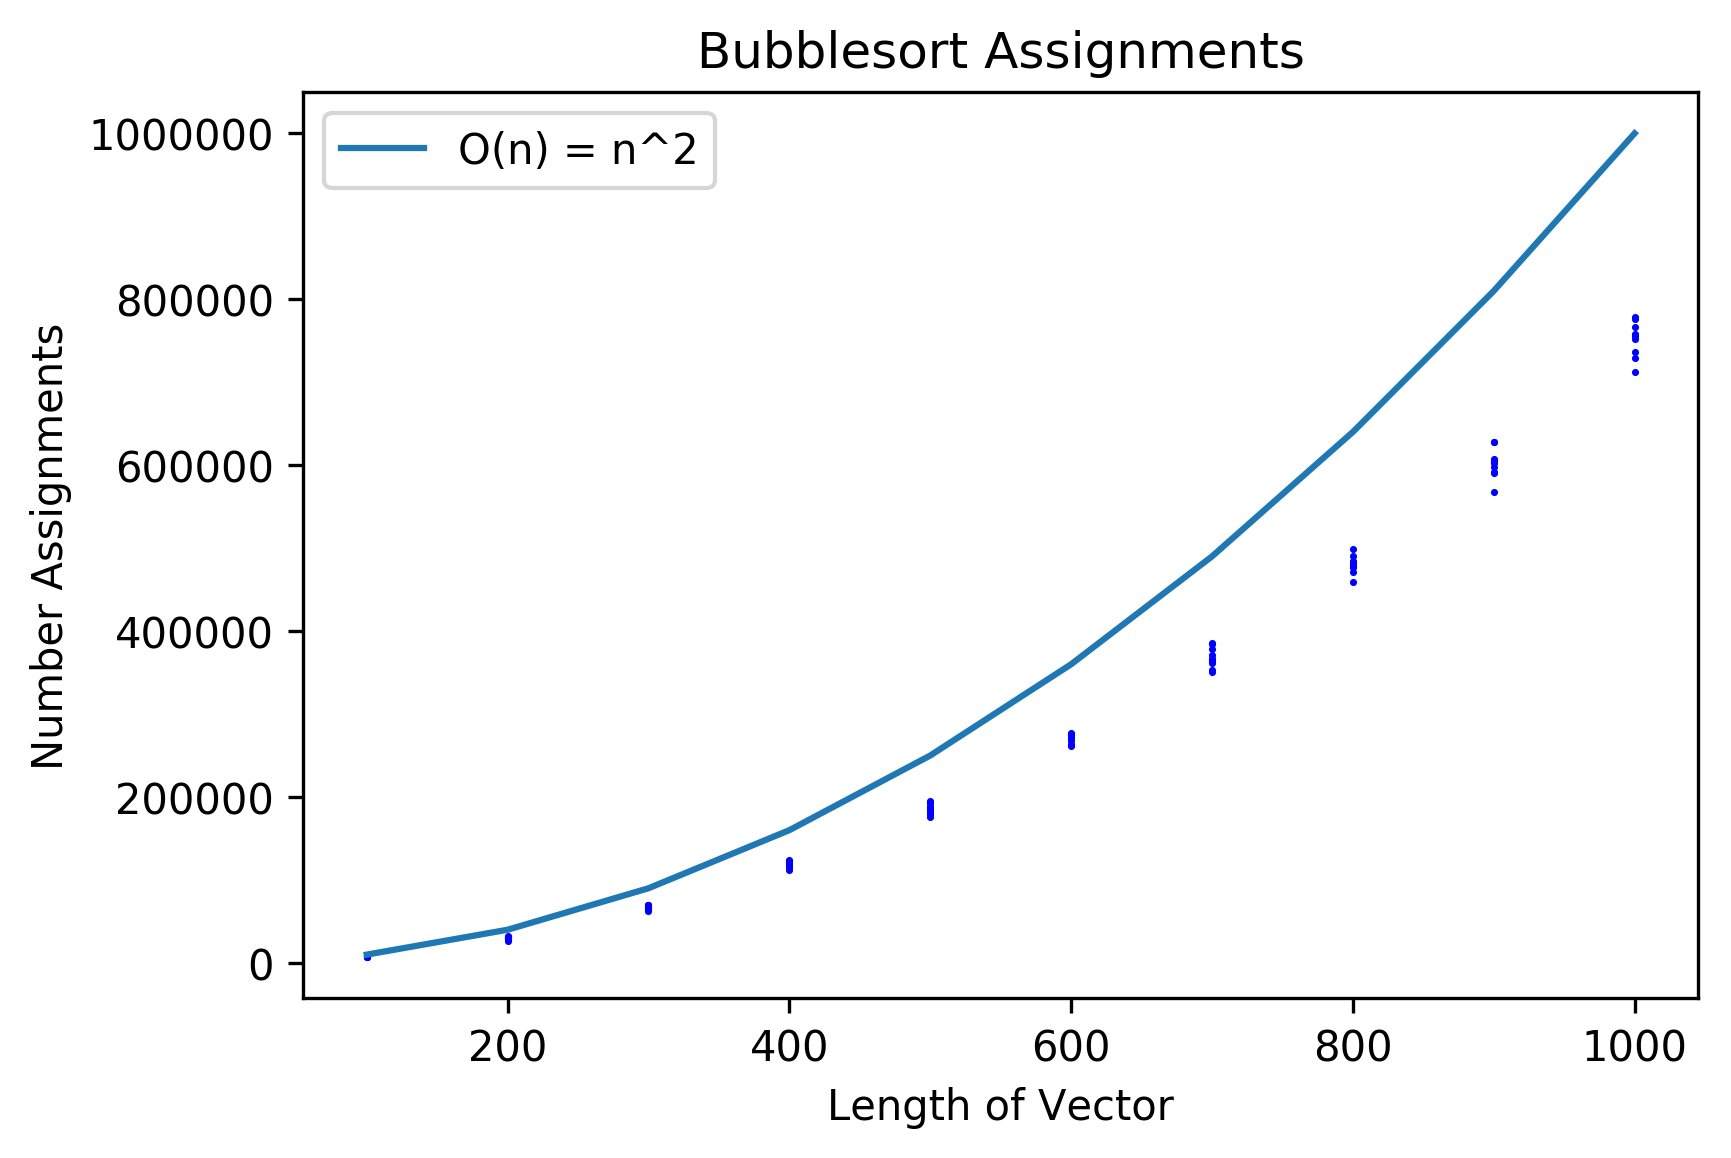

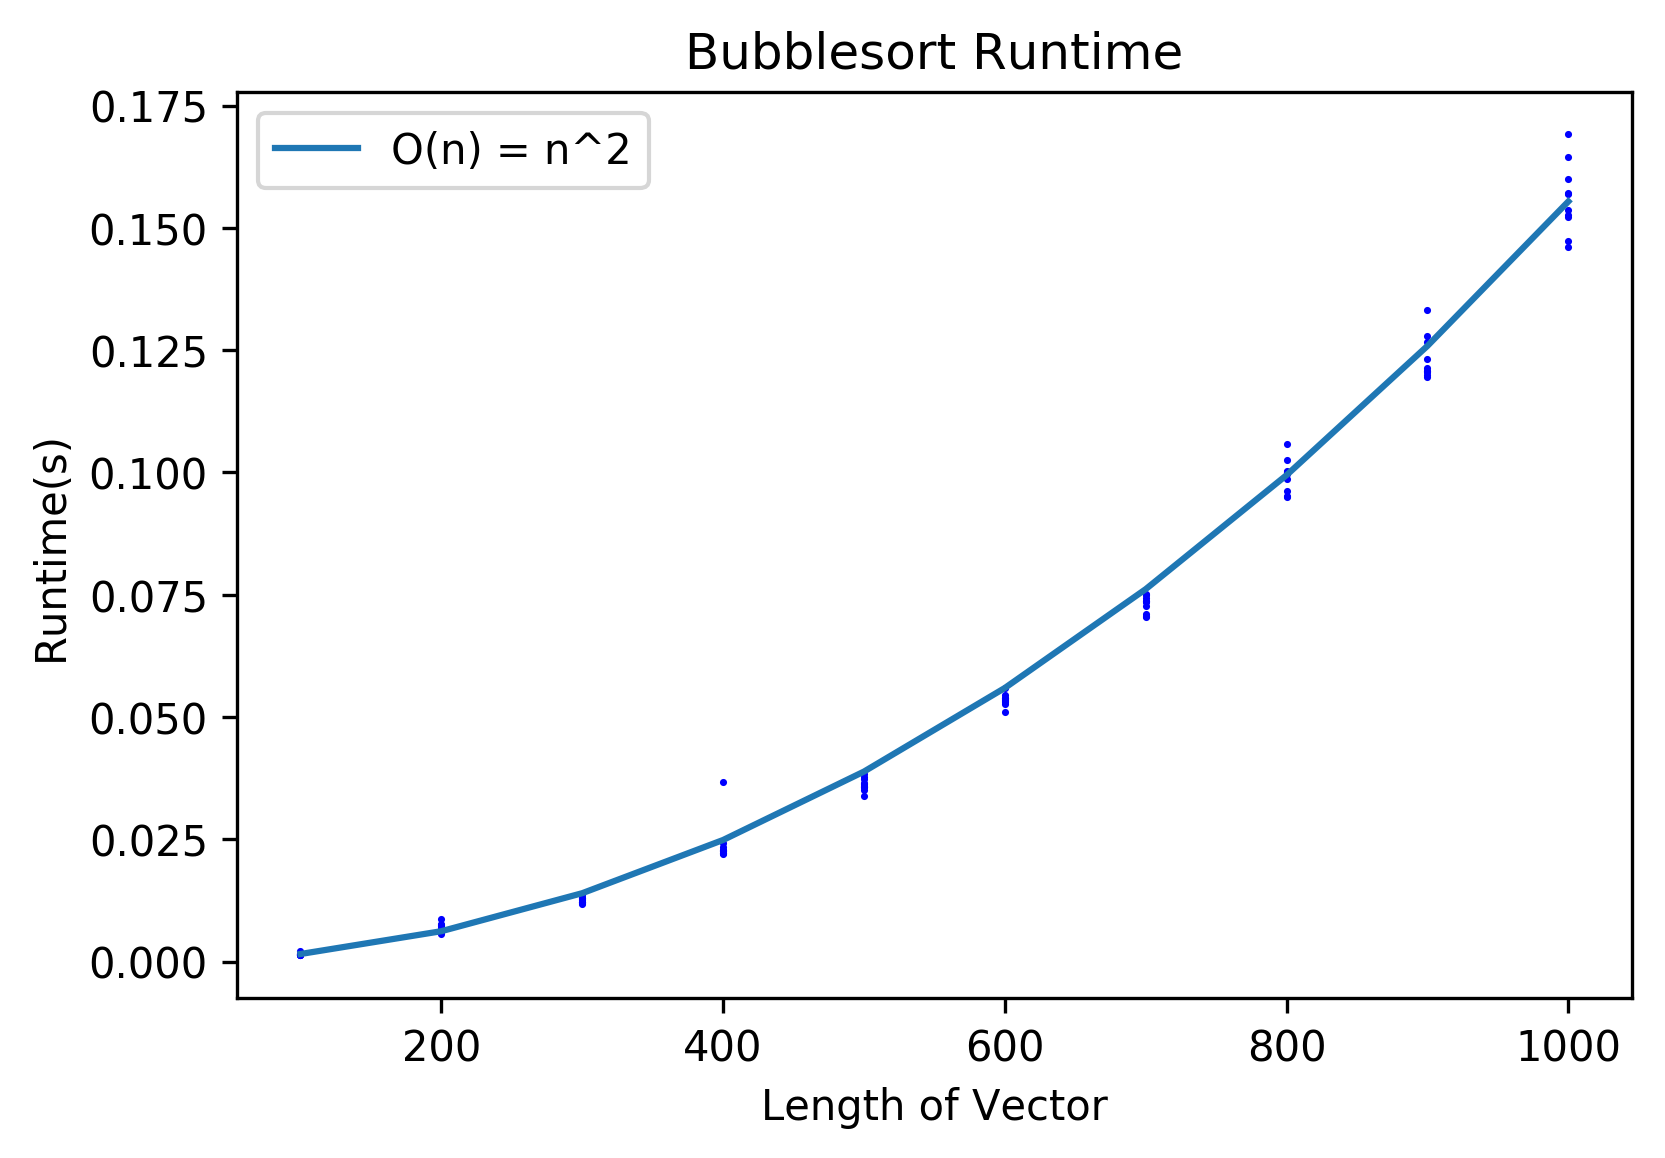

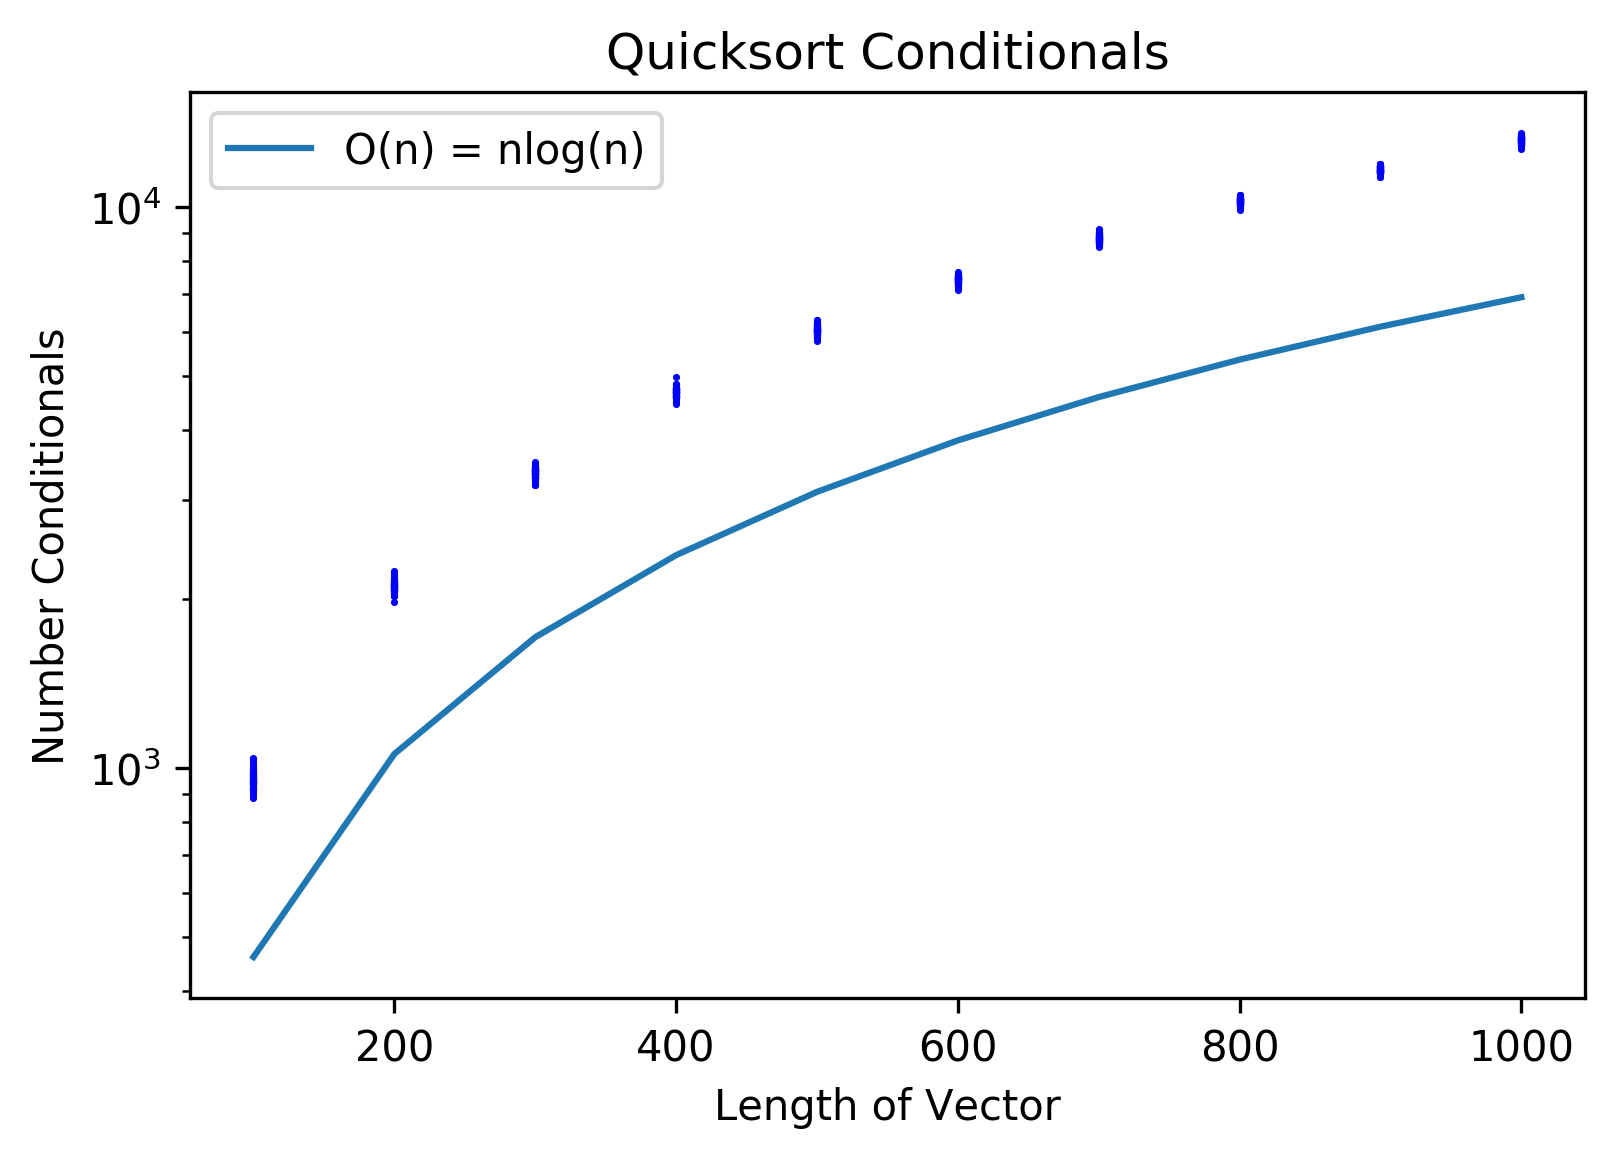

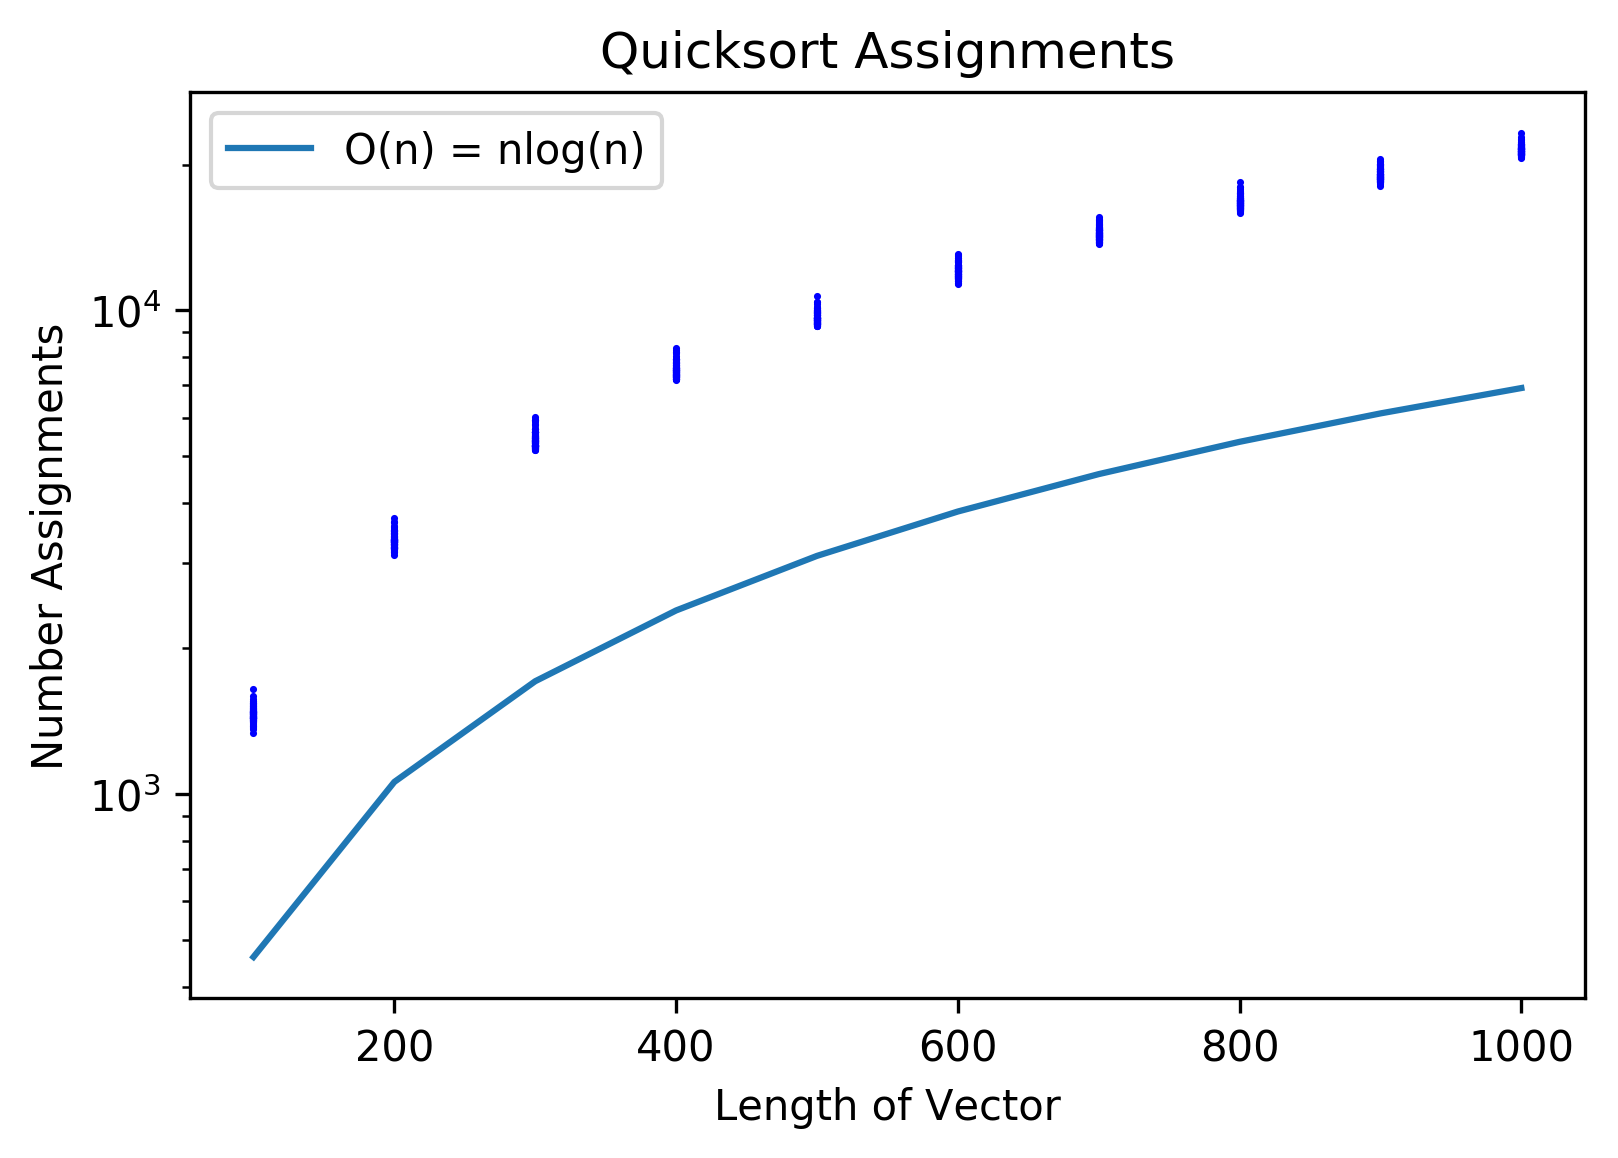

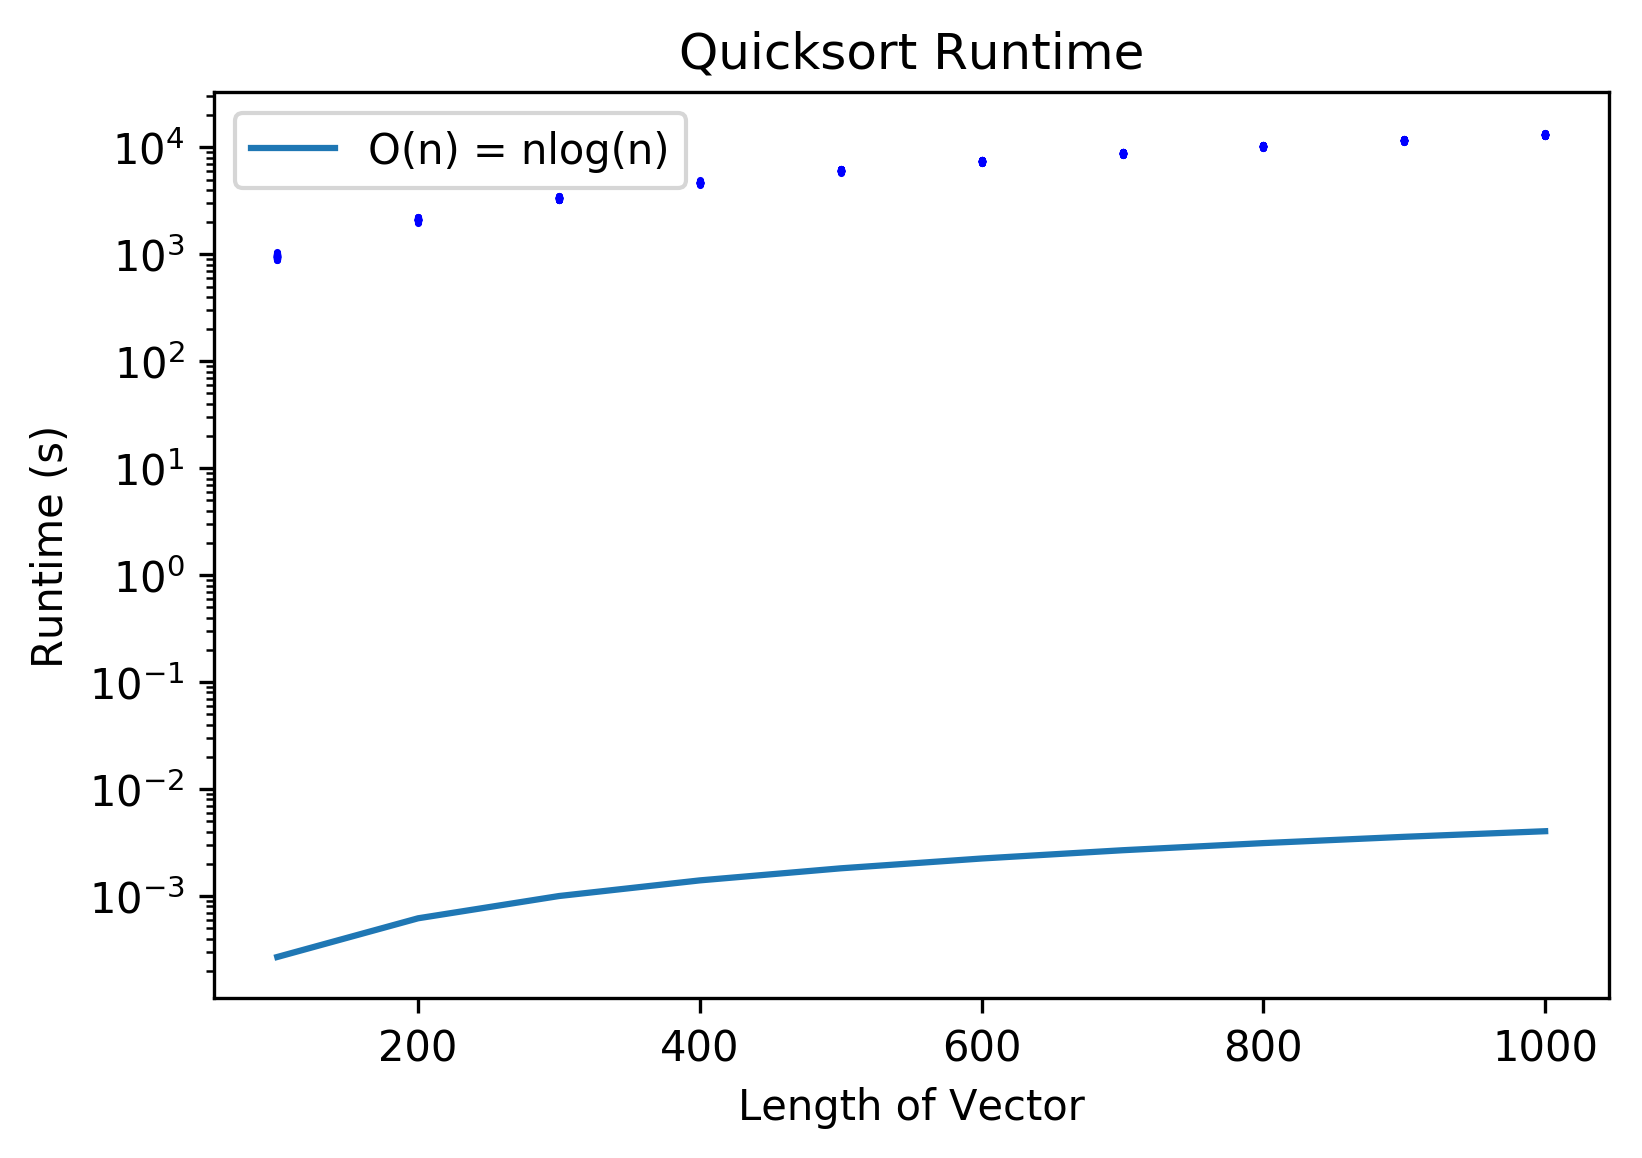

In [11]:
# creating and saving plots
sort_plot(b_cond, 10, 'square', 1, 'standard', "Number Conditionals", 'Bubblesort Conditionals')
sort_plot(b_assign, 10, 'square', 1, 'standard', "Number Assignments", 'Bubblesort Assignments')
sort_plot(b_runtime, 10, 'square', br_scale, 'standard', "Runtime(s)", 'Bubblesort Runtime')
sort_plot(q_cond, 100, 'log', 1, 'log', "Number Conditionals", 'Quicksort Conditionals')
sort_plot(q_assign, 100, 'log', 1, 'log', "Number Assignments", 'Quicksort Assignments')
sort_plot(q_cond, 100, 'log', qr_scale, 'log', "Runtime (s)", 'Quicksort Runtime')